In [1]:
# DATA LOADING

from mobility_data_loader import mobility_data_loader

# Process whole dataset into intermediate form
df = mobility_data_loader('20240101','20240101')

1
20240101 dataframe shape
(85653, 18)


In [2]:
import pandas as pd 
# Get tourists common ids
tourists_common_ids_df = pd.read_csv('data/processed/tourists_common_ids.csv')
tourists_common_ids_df.head()

common_id
0      f0edd6b6f8212254055afccab3e01e7a
1  792a4f51-2d56-4aae-928c-2952d820a9b9
2      ef0b4dd70578af454b85241236309c86
3      62814c206e61f36f31cc5c7655c188d3
4      a3ef6efaef7fe36a18ce6bf105420d2c

In [3]:
tourists_common_ids_df.shape

(423, 1)

In [4]:
day1 = df['20240101']

In [5]:
# Filter day1 based on common_id in tourists_common_ids_df
tourists_day1 = day1[day1['common_id'].isin(tourists_common_ids_df['common_id'])]

# Display the filtered DataFrame
print(tourists_day1.shape)

(1228, 18)


In [6]:
# Mapping and visualize tourists homes

from ishikawa_region_mapper import ishikawa_region_mapper
from travel_plotter import travel_plotter
map, jpn_adm2 = ishikawa_region_mapper()
map = travel_plotter(map, tourists_day1)
map

In [9]:
from home_plotter import home_plotter
map, jpn_adm2 = ishikawa_region_mapper()
tourists_home_map = home_plotter(map, tourists_day1)
tourists_home_map

In [7]:
tourists_day1.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d       arrive_time_d  stay_time_d  \
14    36.896218   136.795423 2024-01-01 00:51:42          569   
69    37.090278   136.913713 2024-01-01 05:06:34          197   
113   36.984384   136.809174 2024-01-01 00:15:04           23   
269   36.522416   136.894923 2024-01-01 00:32:36          567   
293   37.080059   136.934179 2024-01-01 00:16:16           20   

          depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
14  2024-01-01 10:20:59            1  36.895042  136.788938  36.895125   
69  2024-01-01 08:24:01            4  34.469292  135.405063  34.469292   
113 2024-01-01 00:38:01            5  36.502625  136.613813  36.502625   
269 2024-01-01 09:59:19            6  36.520125  136.888937  36.520125   
293 2024-01-01 00:36:37            2  36.559375  136.641312  36.628458   

    longitude_w  
14   136.788813  
69   135.405063  
113  136.613813  
269  136.888937  
293  136.615188

In [11]:
import geopandas as gpd
# Replace 'path_to_your_shapefile.shp' with the actual path to your shapefile
jpn_adm2 = gpd.read_file('E:\\IRP_noto_earthquake\\data\\raw\\jpn_adm\\jpn_adm_2019_shp\\jpn_admbnda_adm2_2019.shp')
jpn_adm2.crs = 'EPSG:4326'


In [12]:
import folium
from shapely.geometry import Point 

# Convert DataFrame to GeoDataFrame with Points geometry
geometry_home = [Point(xy) for xy in zip(tourists_day1['longitude_h'], tourists_day1['latitude_h'])]
gdf_home = gpd.GeoDataFrame(tourists_day1, geometry=geometry_home, crs='EPSG:4326')


In [13]:
# Perform spatial join
gdf_home_within_adm = gpd.sjoin(gdf_home, jpn_adm2, op='within')


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
gdf_home_within_adm.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d  ... index_right  ADM0_EN ADM0_JA  ADM0_PCODE  \
14    36.896218   136.795423  ...         837    Japan      日本          JP   
69    37.090278   136.913713  ...        1225    Japan      日本          JP   
113   36.984384   136.809174  ...         842    Japan      日本          JP   
269   36.522416   136.894923  ...         811    Japan      日本          JP   
293   37.080059   136.934179  ...         842    Japan      日本          JP   

       ADM1_EN ADM1_JA ADM1_PCODE ADM2_JA         ADM2_EN  ADM2_PCODE  
14    Ishikawa     石川県       JP17     羽咋市      Hakui City     JP17014  
69       Osaka     大阪府       JP27    岸和田市  Kishiwada City     JP27024  
113   Ishikawa     石川県       JP17     金沢市   Kanazawa City     JP17019  
269     Toyama     富山県       JP16     南砺市      Nanto City     JP16003  
293   Ishikawa     石川県       JP17     金沢市   Kanazawa City     JP17019  

[5 rows x 29 columns]

In [15]:
# Assuming gdf_home_within_adm is your GeoDataFrame with home locations and administrative info

# Drop duplicate rows based on 'common_id'
unique_gdf_home_within_adm = gdf_home_within_adm.drop_duplicates(subset=['common_id'])

# Print the GeoDataFrame with unique common_id values
unique_gdf_home_within_adm[['common_id', 'geometry', 'ADM1_EN', 'ADM2_EN']].head()

common_id                    geometry  \
14       b42742fc1ea464a3c66a19c4b00ad603  POINT (136.78894 36.89504)   
69       f0edd6b6f8212254055afccab3e01e7a  POINT (135.40506 34.46929)   
113  792a4f51-2d56-4aae-928c-2952d820a9b9  POINT (136.61381 36.50263)   
269      193ece2acc31acf2f2a0bbb3be789655  POINT (136.88894 36.52013)   
293      ef0b4dd70578af454b85241236309c86  POINT (136.64131 36.55937)   

       ADM1_EN         ADM2_EN  
14    Ishikawa      Hakui City  
69       Osaka  Kishiwada City  
113   Ishikawa   Kanazawa City  
269     Toyama      Nanto City  
293   Ishikawa   Kanazawa City

In [16]:
unique_gdf_home_within_adm.shape

(423, 29)

In [17]:
# Count common_id by ADM1_EN (Prefecture Level)
count_by_ADM1_EN = unique_gdf_home_within_adm.groupby('ADM1_EN')['common_id'].size().reset_index(name='count_common_id_by_ADM1_EN')

print(count_by_ADM1_EN)


       ADM1_EN  count_common_id_by_ADM1_EN
0        Aichi                          18
1        Akita                           1
2       Aomori                           1
3        Chiba                           7
4        Fukui                           3
5      Fukuoka                           2
6    Fukushima                           1
7         Gifu                           6
8        Gunma                           2
9    Hiroshima                           1
10    Hokkaido                           5
11       Hyōgo                           2
12    Ishikawa                         233
13    Kanagawa                          22
14       Kyoto                           7
15      Miyagi                           1
16      Nagano                           2
17        Nara                           2
18     Niigata                           7
19       Osaka                          23
20        Saga                           1
21     Saitama                           9
22       Sh

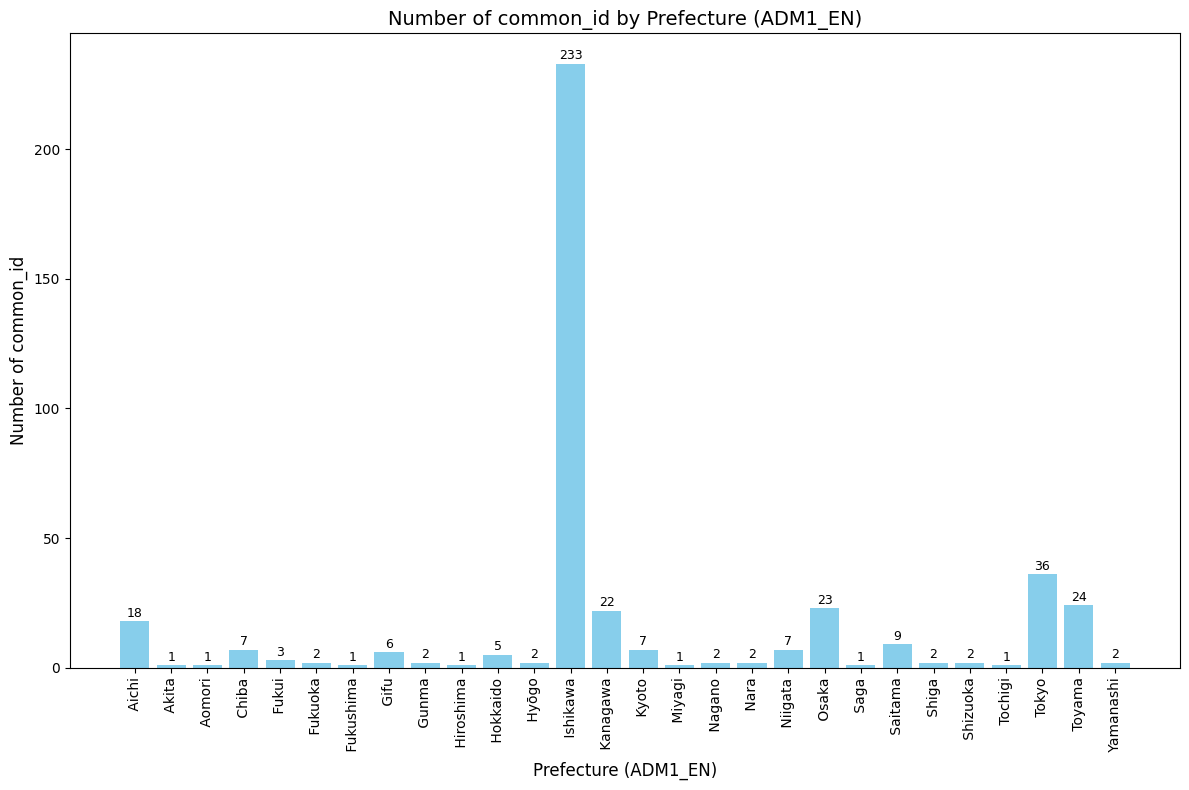

In [18]:
import matplotlib.pyplot as plt

# Data from count_by_ADM1_EN
ADM1_EN = count_by_ADM1_EN['ADM1_EN']
count_common_id = count_by_ADM1_EN['count_common_id_by_ADM1_EN']

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bar chart
bars = ax.bar(ADM1_EN, count_common_id, color='skyblue')

# Adding labels and title
ax.set_xlabel('Prefecture (ADM1_EN)', fontsize=12)
ax.set_ylabel('Number of common_id', fontsize=12)
ax.set_title('Number of common_id by Prefecture (ADM1_EN)', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adding counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


In [19]:
# Count common_id by ADM2_EN (City or District Level)
count_by_ADM2_EN = unique_gdf_home_within_adm.groupby('ADM2_EN')['common_id'].size().reset_index(name='count_common_id_by_ADM2_EN')

# Sort by count_common_id_by_ADM2_EN in descending order
count_by_ADM2_EN_sorted = count_by_ADM2_EN.sort_values(by='count_common_id_by_ADM2_EN', ascending=False)

print(count_by_ADM2_EN_sorted)

            ADM2_EN  count_common_id_by_ADM2_EN
42    Kanazawa City                         145
86    Nonoichi City                          20
20     Hakusan City                          18
77   Nakanoto-machi                          12
39      Kahoku City                          11
..              ...                         ...
50        Kiyota-ku                           1
48   Kishiwada City                           1
47      Kawasaki-ku                           1
46   Kawaguchi City                           1
131   Yokosuka City                           1

[132 rows x 2 columns]


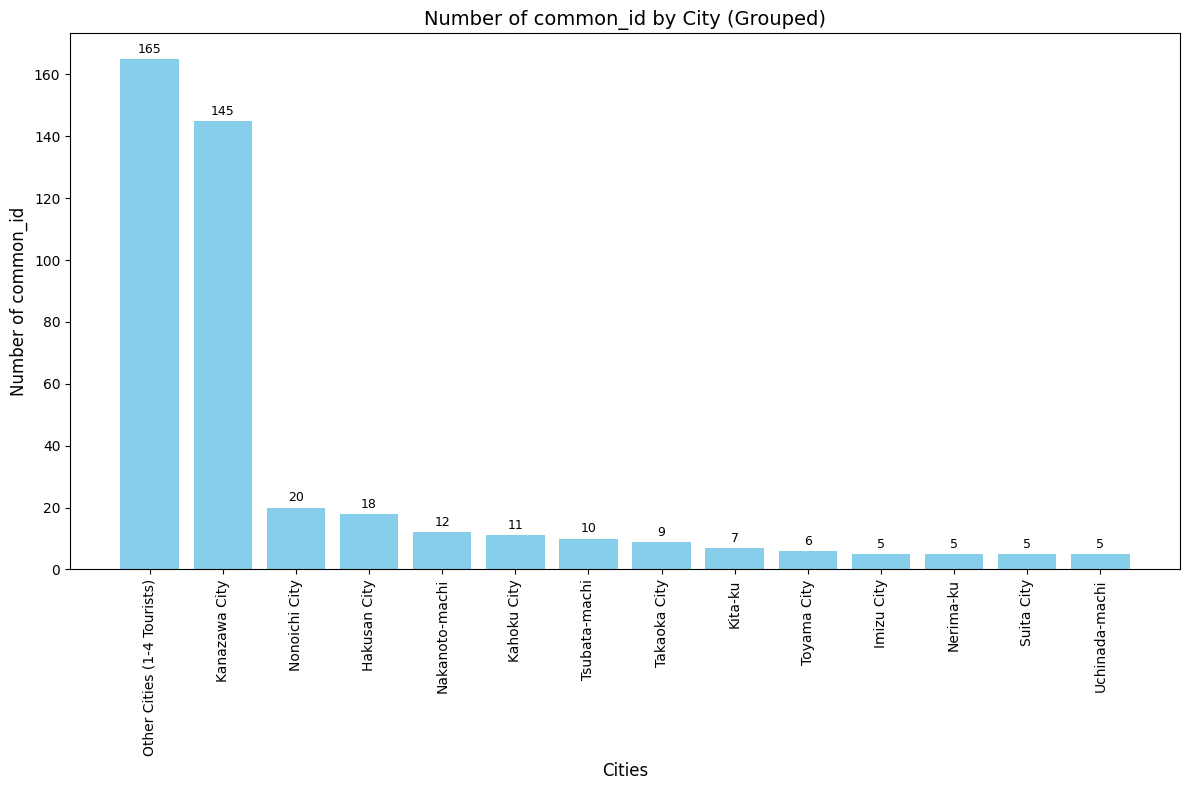

In [20]:
import matplotlib.pyplot as plt

# Group cities with count = 1 into 'Other Cities Each'
threshold = 4  # cities with this count or fewer will be grouped
count_by_ADM2_EN['ADM2_EN_grouped'] = count_by_ADM2_EN.apply(lambda x: x['ADM2_EN'] if x['count_common_id_by_ADM2_EN'] > threshold else 'Other Cities (1-4 Tourists)', axis=1)
grouped_data = count_by_ADM2_EN.groupby('ADM2_EN_grouped')['count_common_id_by_ADM2_EN'].sum().reset_index()

ADM1_EN = count_by_ADM1_EN['ADM1_EN']
count_common_id = count_by_ADM1_EN['count_common_id_by_ADM1_EN']

# Sort grouped data by count_common_id_by_ADM2_EN in descending order for plotting
grouped_data_sorted = grouped_data.sort_values(by='count_common_id_by_ADM2_EN', ascending=False)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(grouped_data_sorted['ADM2_EN_grouped'], grouped_data_sorted['count_common_id_by_ADM2_EN'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Cities', fontsize=12)
ax.set_ylabel('Number of common_id', fontsize=12)
ax.set_title('Number of common_id by City (Grouped)', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adding counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


In [21]:
tourists_day1.shape

(1228, 18)

In [22]:
tourists_day1.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d       arrive_time_d  stay_time_d  \
14    36.896218   136.795423 2024-01-01 00:51:42          569   
69    37.090278   136.913713 2024-01-01 05:06:34          197   
113   36.984384   136.809174 2024-01-01 00:15:04           23   
269   36.522416   136.894923 2024-01-01 00:32:36          567   
293   37.080059   136.934179 2024-01-01 00:16:16           20   

          depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
14  2024-01-01 10:20:59            1  36.895042  136.788938  36.895125   
69  2024-01-01 08:24:01            4  34.469292  135.405063  34.469292   
113 2024-01-01 00:38:01            5  36.502625  136.613813  36.502625   
269 2024-01-01 09:59:19            6  36.520125  136.888937  36.520125   
293 2024-01-01 00:36:37            2  36.559375  136.641312  36.628458   

    longitude_w  
14   136.788813  
69   135.405063  
113  136.613813  
269  136.888937  
293  136.615188

In [23]:
# Detect stay at night and plot it

In [25]:
# Sort by depart_time_o within each common_id group in descending order
tourists_day1_sorted = tourists_day1.sort_values(by=['common_id', 'depart_time_o'], ascending=[True, False])

# Keep only the first row (latest depart_time_o) for each common_id
tourists_day1_last_travel = tourists_day1_sorted.drop_duplicates(subset='common_id', keep='first')

# Display the result
tourists_day1_last_travel.head()

common_id  latitude_o  longitude_o  \
3079   013db532947b7fba6b2510b30efdb014   37.379952   136.903910   
80065  02d66cff5eee9b4264b507df405d860f   37.024952   136.975197   
6036   04dee4fb96e0fa67afe9a60e00e123c4   37.027608   136.767793   
75372  0502a8276ea4e74ee52e342105c9ac1e   37.028617   136.961383   
72027  0531a2a491d6feaad0d3e5f055eace69   37.049617   136.740096   

            arrive_time_o  stay_time_o       depart_time_o  move_time   mode  \
3079  2024-01-01 01:19:42           18 2024-01-01 01:37:42       2144    car   
80065 2024-01-01 20:30:17           36 2024-01-01 21:05:52        458    car   
6036  2023-12-31 18:02:15          618 2024-01-01 04:20:28       1622    car   
75372 2024-01-01 18:22:03           77 2024-01-01 19:38:46         30  train   
72027 2024-01-01 16:47:07          117 2024-01-01 18:44:35       1127    car   

       latitude_d  longitude_d       arrive_time_d  stay_time_d  \
3079    37.390316   136.898877 2024-01-02 13:22:13           47   
80065   37.024685   136.974285 2024-01-02 04:44:33           50   
6036    37.350679   137.101209 2024-01-02 07:22:49           17   
75372   37.028612   136.961408 2024-01-01 20:09:13          796   
72027   37.048968   136.744466 2024-01-02 13:31:51           43   

            depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
3079  2024-01-02 14:08:48            4  36.585958  136.626438  36.592542   
80065 2024-01-02 05:34:22            5  36.578458  136.613813  36.592542   
6036  2024-01-02 07:39:19            4  35.826792  139.865063  35.826792   
75372 2024-01-02 09:25:31            4  34.702625  135.513813  34.702625   
72027 2024-01-02 14:15:14            4  35.010125  135.715063  35.010125   

      longitude_w  
3079   136.628938  
80065  136.628938  
6036   139.865063  
75372  135.513813  
72027  135.715063

In [26]:
tourists_day1_last_travel.shape

(423, 18)

In [28]:
# Find the maximum depart_time_o in the entire DataFrame
max_depart_time = tourists_day1_last_travel['depart_time_o'].max()

# Display the result
print("Latest depart_time_o value in the whole dataframe:", max_depart_time)

Latest depart_time_o value in the whole dataframe: 2024-01-01 23:56:41


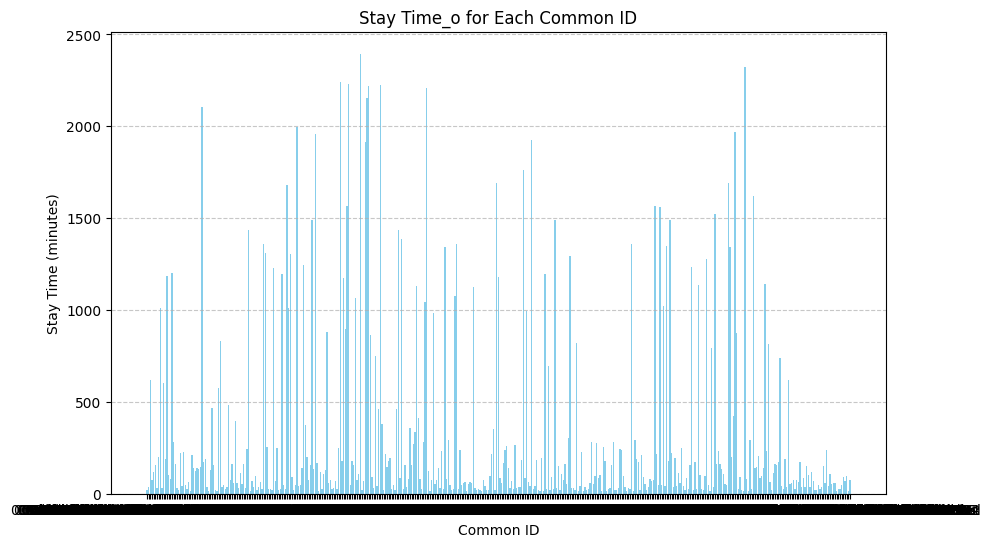

In [30]:
import matplotlib.pyplot as plt
# Plotting stay_time_o
plt.figure(figsize=(10, 6))
plt.bar(tourists_day1_last_travel['common_id'], tourists_day1_last_travel['stay_time_o'], color='skyblue')
plt.xlabel('Common ID')
plt.ylabel('Stay Time (minutes)')
plt.title('Stay Time_o for Each Common ID')
plt.xticks(tourists_day1_last_travel['common_id'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:

# Calculate average stay_time_o
average_stay_time_o = tourists_day1_last_travel['stay_time_o'].mean()

# Display the result
print("Average stay_time_o:", average_stay_time_o)

Average stay_time_o: 322.4775413711584


In [34]:

# Calculate average stay_time_o
max_stay_time_o = tourists_day1_last_travel['stay_time_o'].max()

# Display the result
print("Max stay_time_o:", max_stay_time_o)

Max stay_time_o: 2395


In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tourists_day1_last_travel['stay_time_o'].quantile(0.25)
Q3 = tourists_day1_last_travel['stay_time_o'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = tourists_day1_last_travel[(tourists_day1_last_travel['stay_time_o'] >= lower_bound) & (tourists_day1_last_travel['stay_time_o'] <= upper_bound)]

# Calculate average stay_time_o after removing outliers
average_stay_time_o_filtered = df_filtered['stay_time_o'].mean()

# Display the results
print("Average stay_time_o after removing outliers:", average_stay_time_o_filtered)

Average stay_time_o after removing outliers: 100.26436781609195


In [35]:
checkpoint = tourists_day1_last_travel
# categorize stay hours
bins = [0, 120, 360, 720, 1440, 2880]
labels = ['< 2 hours', '2-6 hours', '6-12 hours', '12-24 hours', '24-48 hours']

# Add a new column with categories based on stay_time_o
checkpoint['stay_category'] = pd.cut(checkpoint['stay_time_o'], bins=bins, labels=labels, right=False)

# Count occurrences in each category
category_counts = checkpoint['stay_category'].value_counts().sort_index()

# Print the results
for category, count in category_counts.items():
    print(f"{category}: {count}")

< 2 hours: 240
2-6 hours: 98
6-12 hours: 15
12-24 hours: 44
24-48 hours: 26


C:\Users\HP\AppData\Local\Temp\ipykernel_12452\1620197835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkpoint['stay_category'] = pd.cut(checkpoint['stay_time_o'], bins=bins, labels=labels, right=False)


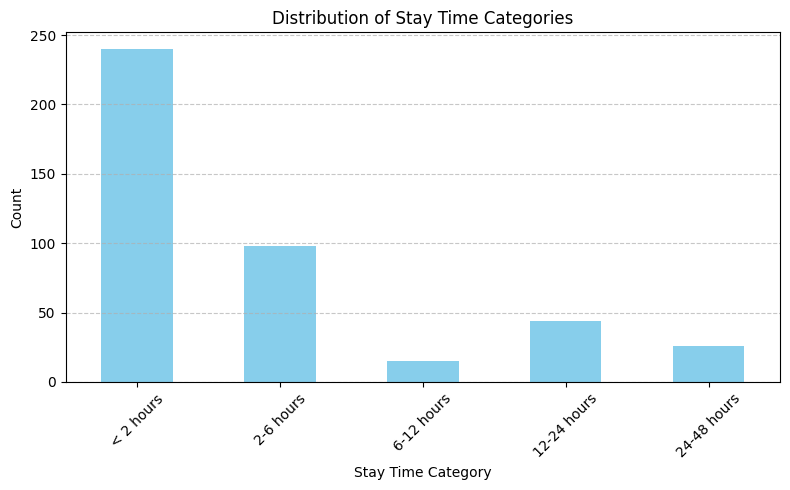

In [36]:

# Plotting
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Stay Time Category')
plt.ylabel('Count')
plt.title('Distribution of Stay Time Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
tourists_day1_last_travel.shape

(423, 19)

In [38]:
map, jpn_adm2 = ishikawa_region_mapper()
map = travel_plotter(map, tourists_day1_last_travel)
map

In [8]:
tourists_day1.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d       arrive_time_d  stay_time_d  \
14    36.896218   136.795423 2024-01-01 00:51:42          569   
69    37.090278   136.913713 2024-01-01 05:06:34          197   
113   36.984384   136.809174 2024-01-01 00:15:04           23   
269   36.522416   136.894923 2024-01-01 00:32:36          567   
293   37.080059   136.934179 2024-01-01 00:16:16           20   

          depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
14  2024-01-01 10:20:59            1  36.895042  136.788938  36.895125   
69  2024-01-01 08:24:01            4  34.469292  135.405063  34.469292   
113 2024-01-01 00:38:01            5  36.502625  136.613813  36.502625   
269 2024-01-01 09:59:19            6  36.520125  136.888937  36.520125   
293 2024-01-01 00:36:37            2  36.559375  136.641312  36.628458   

    longitude_w  
14   136.788813  
69   135.405063  
113  136.613813  
269  136.888937  
293  136.615188

In [9]:
tourists_day1.shape

(1228, 18)

In [10]:
import pandas as pd
import plotly.express as px

# Initialize an empty list to store data for animation
animation_data = []

# Iterate through each row (each travel)
for index, row in tourists_day1.iterrows():
    # Extract relevant details
    start_time = row['arrive_time_o']
    end_time = row['depart_time_o']
    origin_lat = row['latitude_o']
    origin_lon = row['longitude_o']
    dest_lat = row['latitude_d']
    dest_lon = row['longitude_d']
    
    # Create a timestamp range for each hour of travel
    hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')
    
    # Append data for each hour to animation_data
    for timestamp in hourly_range:
        animation_data.append({
            'timestamp': timestamp,
            'origin_lat': origin_lat,
            'origin_lon': origin_lon,
            'dest_lat': dest_lat,
            'dest_lon': dest_lon
        })

# Convert animation_data to DataFrame
animation_df = pd.DataFrame(animation_data)

C:\Users\HP\AppData\Local\Temp\ipykernel_20852\4213427855.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')


In [11]:
import pandas as pd
import plotly.express as px
import os

# Assuming animation_df is prepared as per previous steps

# Create the animated plot using Plotly Express
fig = px.scatter_mapbox(animation_df,
                        lat=animation_df['origin_lat'],
                        lon=animation_df['origin_lon'],
                        hover_name='timestamp',
                        zoom=5)

# Add destinations as markers
fig.add_scattermapbox(lat=animation_df['dest_lat'],
                      lon=animation_df['dest_lon'],
                      mode='markers',
                      marker=dict(size=10, color='green'),
                      hoverinfo='skip')

# Update layout for better visualization
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=5,
                  mapbox_center={"lat": animation_df['origin_lat'].mean(),
                                 "lon": animation_df['origin_lon'].mean()},
                  margin={"r": 0, "t": 0, "l": 0, "b": 0},
                  title="Travel Animation")

# Create the animation frames
frames = [dict(data=[dict(type='scattermapbox',
                          lat=[row['origin_lat'], row['dest_lat']],
                          lon=[row['origin_lon'], row['dest_lon']],
                          mode='lines+markers',
                          hoverinfo='skip')]) for _, row in animation_df.iterrows()]

# Update frames in the figure
fig.update(frames=frames)

# Directory to save images
save_dir = './animation_frames/'

# Ensure directory exists
os.makedirs(save_dir, exist_ok=True)

# Iterate through each frame and save as image
for i in range(len(fig.frames)):
    filename = f'frame_{i+1}.png'
    filepath = os.path.join(save_dir, filename)
    fig.update(frames=[fig.frames[i]])  # Update figure with current frame
    fig.write_image(filepath)

    print(f'Saved {filename}')

print('Images saved successfully.')


Saved frame_1.png
Saved frame_2.png
Saved frame_3.png
Saved frame_4.png
Saved frame_5.png
Saved frame_6.png
Saved frame_7.png
Saved frame_8.png
Saved frame_9.png
Saved frame_10.png
Saved frame_11.png
Saved frame_12.png
Saved frame_13.png
Saved frame_14.png
Saved frame_15.png
Saved frame_16.png
Saved frame_17.png
Saved frame_18.png
Saved frame_19.png
Saved frame_20.png
Saved frame_21.png
Saved frame_22.png
Saved frame_23.png
Saved frame_24.png
Saved frame_25.png
Saved frame_26.png
Saved frame_27.png
Saved frame_28.png
Saved frame_29.png
Saved frame_30.png
Saved frame_31.png
Saved frame_32.png
Saved frame_33.png
Saved frame_34.png
Saved frame_35.png
Saved frame_36.png
Saved frame_37.png
Saved frame_38.png
Saved frame_39.png
Saved frame_40.png
Saved frame_41.png
Saved frame_42.png
Saved frame_43.png
Saved frame_44.png
Saved frame_45.png
Saved frame_46.png
Saved frame_47.png
Saved frame_48.png
Saved frame_49.png
Saved frame_50.png
Saved frame_51.png
Saved frame_52.png
Saved frame_53.png
Sa

KeyboardInterrupt: 

In [1]:
# Return date